In [9]:
import os
os.chdir('/nfs/homedirs/rachwan/Evaluation-Tool')

# ResNet18

In [10]:
import copy

from utils.model_utils import *
from models.networks.ResNet18 import ResNet18

from models.metrics.Evaluator import Evaluator

## Load Model

In [11]:
model = ResNet18()

## Load Evaluation Tool

In [12]:
evaluator = Evaluator()

## Load Loss

In [13]:
loss = torch.nn.CrossEntropyLoss()

## Evaluate model Batch Iteration on an image of size 224 and a batch size of 128

In [14]:
evaluator.evaluate_training(model, tuple([3,244,244]), loss, 128, 'cuda')

In [15]:
r18metrics = copy.deepcopy(evaluator.get_all_metrics())
r18metrics

{'time': 204.72012329101562,
 'gpu': 3.578036736,
 'disk': 99.3140145,
 'cost': 0.82,
 'emission': 0.011407341471016554,
 'energy': 0.03789814442198191}

# ResNet50

In [16]:
from models.networks.ResNet50 import ResNet50

In [17]:
model = ResNet50()

In [18]:
evaluator = Evaluator()

In [19]:
loss = torch.nn.CrossEntropyLoss()

In [20]:
evaluator.evaluate_training(model, tuple([3,244,244]), loss, 128, 'cuda')

In [21]:
r50metrics = copy.deepcopy(evaluator.get_all_metrics())
r50metrics

{'time': 354.80267333984375,
 'gpu': 13.706692096000001,
 'disk': 207.8178385,
 'cost': 0.82,
 'emission': 0.020364831842104747,
 'energy': 0.06765724864486627}

# Compare Models

In [22]:
import matplotlib.pyplot as plt
import numpy as np

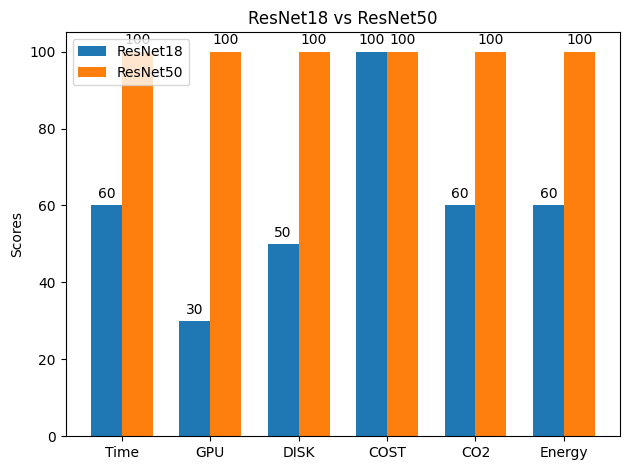

In [23]:
labels = ['Time', 'GPU', 'DISK', 'COST', 'CO2', 'Energy']
r18_means = [round(r18/r50,1) * 100 for r18, r50 in zip(r18metrics.values(), r50metrics.values())]
r50_means = [100 for v in r50metrics.values()]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, r18_means, width, label='ResNet18')
rects2 = ax.bar(x + width/2, r50_means, width, label='ResNet50')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('ResNet18 vs ResNet50')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()